# Clasificador de imagenes entre DROWSY y NORMAL

Se hizo uso de una base de datos publica, de la pagina kaggle, debido a que no se conto con el tiempo para recolectar imagenes donde se cumplieran las condiciones de sueño al volante. Dicho set de datos esta dividido en dos grupos, DROWSY y NORMAL, ademas las imagenes estan en escala de grises para reducir la dimencion de los datos y se reescalaron a 48*48 pixeles para reducir el costo computacional.

## Carga de librerias

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import os

## Configuracion de la ruta del DataSet

In [4]:
base_dir = '/content/drive/MyDrive/IA/DDD'
train_dir_drowsy = os.path.join(base_dir, 'DROWSY')
train_dir_non_drowsy = os.path.join(base_dir, 'NATURAL')

## Divison de datos de entrenamiento, prueba y validacion

In [ ]:
import os
import shutil
import random

def split_data(source_dir, train_dir, test_dir, val_dir, total_files=1000, train_ratio=0.7, test_ratio=0.2, val_ratio=0.1):
    files = os.listdir(source_dir)
    random.shuffle(files)

    # Seleccionar 1000 archivos de manera aleatoria
    selected_files = files[:total_files]

    train_split = int(total_files * train_ratio)
    test_split = int(total_files * (train_ratio + test_ratio))

    train_files = selected_files[:train_split]
    test_files = selected_files[train_split:test_split]
    val_files = selected_files[test_split:]

    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dir, file))

    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(test_dir, file))

    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_dir, file))

# Define your directories
base_dir = '/content/drive/MyDrive/IA/DDD'
source_drowsy_dir = os.path.join(base_dir, 'DROWSY')
source_non_drowsy_dir = os.path.join(base_dir, 'NATURAL')

train_drowsy_dir = os.path.join(base_dir, 'train', 'DROWSY')
test_drowsy_dir = os.path.join(base_dir, 'test', 'DROWSY')
val_drowsy_dir = os.path.join(base_dir, 'validation', 'DROWSY')

train_non_drowsy_dir = os.path.join(base_dir, 'train', 'NATURAL')
test_non_drowsy_dir = os.path.join(base_dir, 'test', 'NATURAL')
val_non_drowsy_dir = os.path.join(base_dir, 'validation', 'NATURAL')

# Create directories if they don't exist
os.makedirs(train_drowsy_dir, exist_ok=True)
os.makedirs(test_drowsy_dir, exist_ok=True)
os.makedirs(val_drowsy_dir, exist_ok=True)
os.makedirs(train_non_drowsy_dir, exist_ok=True)
os.makedirs(test_non_drowsy_dir, exist_ok=True)
os.makedirs(val_non_drowsy_dir, exist_ok=True)

# Split the data
split_data(source_drowsy_dir, train_drowsy_dir, test_drowsy_dir, val_drowsy_dir)
split_data(source_non_drowsy_dir, train_non_drowsy_dir, test_non_drowsy_dir, val_non_drowsy_dir)

## Preprocesamiento de datos

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1400 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


## Definir el modelo

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Entrenar el modelo

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
43/43 [==============================] - 352s 8s/step - loss: 0.5689 - accuracy: 0.7237 - val_loss: 0.3294 - val_accuracy: 0.8594
Epoch 2/50
43/43 [==============================] - 82s 2s/step - loss: 0.2630 - accuracy: 0.8808 - val_loss: 0.1937 - val_accuracy: 0.9010
Epoch 3/50
43/43 [==============================] - 84s 2s/step - loss: 0.1825 - accuracy: 0.9327 - val_loss: 0.1472 - val_accuracy: 0.9531
Epoch 4/50
43/43 [==============================] - 85s 2s/step - loss: 0.1226 - accuracy: 0.9532 - val_loss: 0.1709 - val_accuracy: 0.9427
Epoch 5/50
43/43 [==============================] - 85s 2s/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 0.1517 - val_accuracy: 0.9531
Epoch 6/50
43/43 [==============================] - 82s 2s/step - loss: 0.0690 - accuracy: 0.9744 - val_loss: 0.1505 - val_accuracy: 0.9531
Epoch 7/50
43/43 [==============================] - 85s 2s/step - loss: 0.0535 - accuracy: 0.9759 - val_loss: 0.1460 - val_accuracy: 0.9688
Epoch 8/50
43/43 [=

## Evaluar el modelo

In [8]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

7/7 [==============================] - 5s 625ms/step - loss: 0.2780 - accuracy: 0.9653
Validation Accuracy: 96.53%


## Guardar el modelo

In [9]:
model.save('/content/drive/MyDrive/IA/DDD/NEW/drowsiness_detector_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Cargar modelo

In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/IA/DDD/NEW/drowsiness_detector_model.h5'
model = load_model(model_path)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    return 'NORMAL' if prediction[0][0] > 0.5 else 'DROWSY'

img_path = '/content/drive/MyDrive/IA/DDD/NEW/Prueba/4N.png'
result = predict_image(img_path, model)
print(f'The person in the image is {result}')

1/1 [==============================] - 0s 319ms/step
The person in the image is NORMAL


## Evaluacion del modelo

Found 398 images belonging to 2 classes.
13/13 [==============================] - 8s 520ms/step - loss: 0.3772 - accuracy: 0.9573
Test Accuracy: 95.73%
Test Loss: 0.37723514437675476
13/13 [==============================] - 12s 909ms/step
              precision    recall  f1-score   support

      NORMAL       0.94      0.98      0.96       199
      DROWSY       0.98      0.93      0.96       199

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



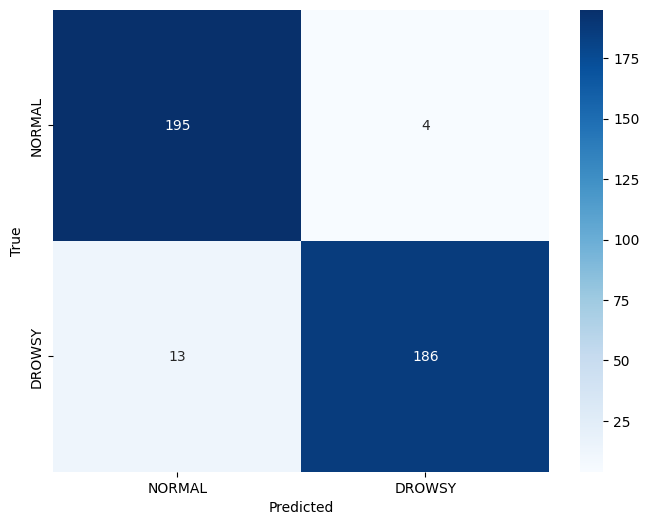

In [13]:
# Configurar el generador de datos de prueba
base_dir = '/content/drive/MyDrive/IA/DDD'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluar el modelo
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(f'Test Loss: {loss}')

# Obtener predicciones y etiquetas verdaderas
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int).reshape(-1)
y_true = test_generator.classes

# Generar reporte de clasificación
print(classification_report(y_true, y_pred, target_names=['NORMAL', 'DROWSY']))

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NORMAL', 'DROWSY'], yticklabels=['NORMAL', 'DROWSY'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
